# Quantile MLPRegressor

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression for multi-layer perceptron. [mlinsights](https://sdpython.github.io/doc/dev/mlinsights/) implements a version of it based on the *scikit-learn* model. The implementation overwrites method ``_backprop``.

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

We generate some dummy data.

In [3]:
import numpy
X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [4]:
from sklearn.neural_network import MLPRegressor
clr = MLPRegressor(hidden_layer_sizes=(30,), activation='tanh')
clr.fit(X, Y)

MLPRegressor(activation='tanh', hidden_layer_sizes=(30,))

In [5]:
from mlinsights.mlmodel import QuantileMLPRegressor
clq = QuantileMLPRegressor(hidden_layer_sizes=(30,), activation='tanh')
clq.fit(X, Y)

QuantileMLPRegressor(activation='tanh', hidden_layer_sizes=(30,))

In [6]:
from pandas import DataFrame
data= dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clr,clq
0,0.251734,6.470634,7.059780,6.481283
1,0.538065,7.423694,8.029974,7.510084
2,0.530510,7.411181,8.006414,7.485186
3,0.048348,5.808051,6.278572,5.646920
4,0.882162,8.624456,8.986741,8.519049


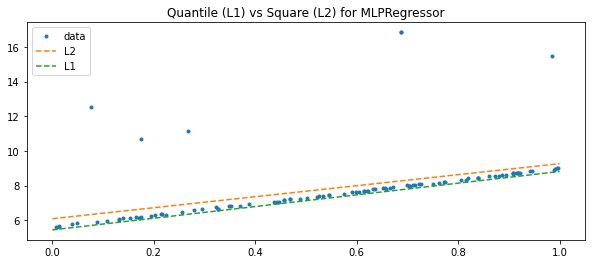

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2) for MLPRegressor")
ax.legend();